In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
data.head()
df = pd.DataFrame(data)
%matplotlib inline

In [104]:
df.count()

age                    1190
sex                    1190
chest pain type        1190
resting bp s           1190
cholesterol            1190
fasting blood sugar    1190
resting ecg            1190
max heart rate         1190
exercise angina        1190
oldpeak                1190
ST slope               1190
target                 1190
dtype: int64

In [105]:
pd.isna(any(df))

False

In [106]:
any(df.duplicated())

True

In [107]:
df = df.drop_duplicates()

In [108]:
any(df.duplicated())

False

In [109]:
df.count()

age                    918
sex                    918
chest pain type        918
resting bp s           918
cholesterol            918
fasting blood sugar    918
resting ecg            918
max heart rate         918
exercise angina        918
oldpeak                918
ST slope               918
target                 918
dtype: int64

In [7]:
# import ydata profiling raport
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")

In [8]:
profile.to_file("output.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

swaping 0 to None

<Axes: xlabel='cholesterol', ylabel='Count'>

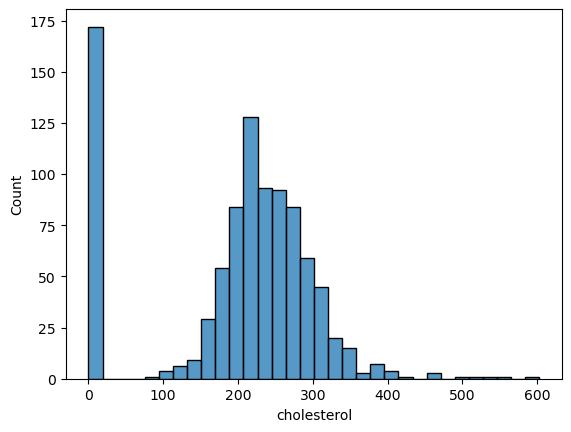

In [110]:
sns.histplot(df, x = "cholesterol")

In [111]:
df['cholesterol'] = df["cholesterol"].apply(lambda x: x if x != 0 else None)

<Axes: xlabel='cholesterol', ylabel='Count'>

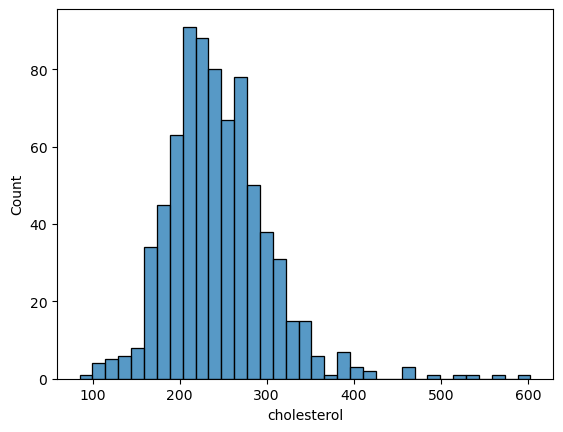

In [112]:
sns.histplot(df, x = "cholesterol")

<Axes: >

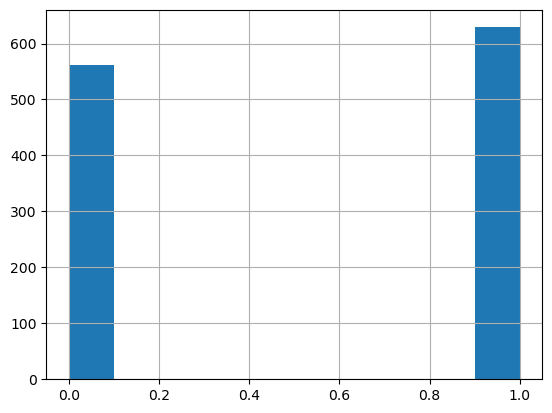

In [63]:
data["target"].hist()

In [114]:
df.dropna(inplace=True)

target = df['target']
features = df.drop('target', axis=1)

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0xc00ff3)

<Axes: >

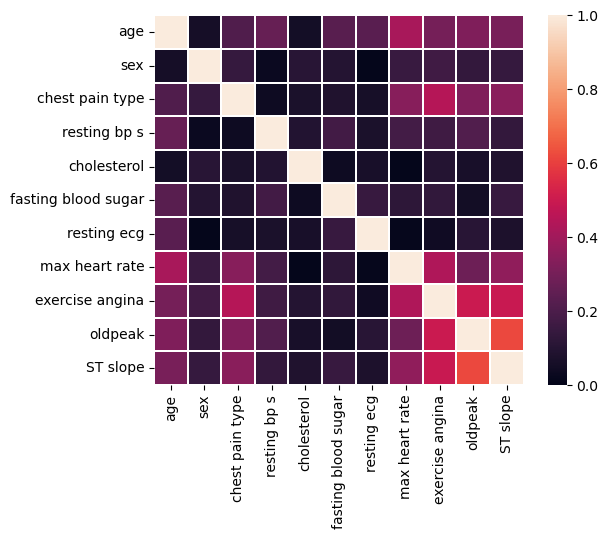

In [123]:
corr = X_train.corr()
# cmap = sns.diverging_palette(center="dark", as_cmap = True)
sns.heatmap(abs(corr), vmax=1, vmin=0, square=True, linewidths=0.2)

In [124]:
categorical_columns = ["sex", "chest pain type", "fasting blood sugar", "resting ecg", "exercise angina", "ST slope"]
real_columns = [f for f in X_train.columns if f not in categorical_columns]

categorical_features = X_train[categorical_columns]
real_features = X_train[real_columns]

In [125]:
real_features

,age,resting bp s,cholesterol,max heart rate,oldpeak
140,52,160,331.0,94,2.5
688,57,120,354.0,163,0.6
182,51,130,224.0,150,0.0
875,64,140,335.0,158,0.0
770,64,130,303.0,122,2.0
...,...,...,...,...,...
796,50,129,196.0,163,0.0
587,53,124,243.0,122,2.0
70,57,140,265.0,145,1.0
202,46,120,230.0,150,0.0


In [126]:
categorical_features

,sex,chest pain type,fasting blood sugar,resting ecg,exercise angina,ST slope
140,1,4,0,0,1,2
688,0,4,0,0,1,1
182,1,2,0,0,0,1
875,1,3,0,0,0,1
770,0,4,0,0,0,2
...,...,...,...,...,...,...
796,1,3,0,0,0,1
587,1,4,0,0,1,2
70,1,2,0,1,1,2
202,1,3,0,0,0,1


In [128]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# pd.isna(real_features).sum()

gaussian_nb = GaussianNB()
gaussian_nb.fit(real_features, y_train)


GaussianNB()

In [133]:
from sklearn.metrics import confusion_matrix

y_computed = gaussian_nb.predict(X_test[real_columns])
confusion_matrix(y_test,y_computed)

array([[63, 19],
       [23, 45]])